In [143]:
import sklearn
import numpy as np
import pandas as pd
import time
np.set_printoptions(edgeitems=10, linewidth=100)

In [4]:
train_data = pd.read_csv('./data/small_train_data.csv', index_col=0)
test_data = pd.read_csv('./data/small_test_data.csv', index_col=0)

In [355]:
import ALSmodel
import importlib
importlib.reload(ALSmodel)

<module 'ALSmodel' from '/Users/timhsu/Documents/COURSES/DS1003/project/ALSmodel.py'>

In [325]:
model = ALSmodel.ALSRecommender(max_iter=20, n_factors=50)

In [326]:
model.prepare(train_data, test_data)

ALSRecommender(item_col='movieId', lambda_reg=1, max_iter=20, n_factors=50,
        rating_col='rating', user_col='userId')

## SGD

In [382]:
import ALSmodel
import importlib
importlib.reload(ALSmodel)

<module 'ALSmodel' from '/Users/timhsu/Documents/COURSES/DS1003/project/ALSmodel.py'>

In [383]:
sgd_model = ALSmodel.ALSRecommender(max_iter=10, n_factors=50, lr=0.001)

In [384]:
sgd_model.prepare(train_data, test_data)

ALSRecommender(item_col='movieId', lambda_reg=1, lr=0.001, max_iter=10,
        n_factors=50, rating_col='rating', user_col='userId')

In [ ]:
sgd_model.fit_sgd(10)

In [379]:
sgd_model.score(train_data)

1.1806984163563652

In [380]:
sgd_model.score(test_data)

1.1688673787987178

In [385]:
train_scores = []
test_scores = []
for it in range(10):
    sgd_model.fit_sgd(5)
    train_scores.append(sgd_model.score(train_data))
    test_scores.append(sgd_model.score(test_data))

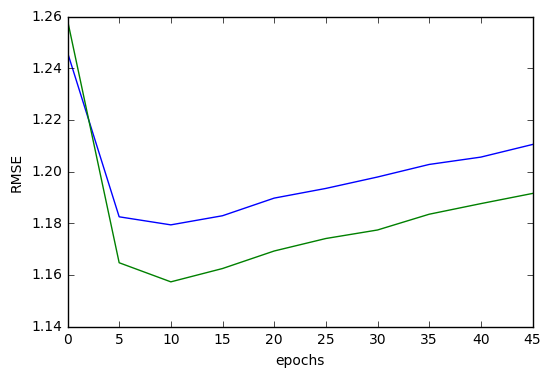

In [391]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.arange(10)*5, train_scores)
plt.plot(np.arange(10)*5, test_scores)
plt.xlabel('epochs')
plt.ylabel('RMSE')